In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
from data.audio_dataset import AudioSpectrogramDataset
from models.WGAN_model.WPGAN import WPGAN
from models.WGAN_model.config import *

import torch
import librosa
import soundfile as sf
from torch.utils.data import DataLoader

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = AudioSpectrogramDataset(base_directory=base_directory, spectro_type='mel')
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
Music_WPGAN = WPGAN(
    latent_dim=latent_dim,
    output_dim=output_dim,
    lr=learning_rate,
    loss=loss,
    batch_size=batch_size,
    depths=depths, 
    negative_slope=negative_slope,
    fade_in_percentage=fade_in_percentage,
    normalization=normalization,
    mini_batch_normalization=mini_batch_normalization,
    init_resolution_size=init_resolution_size,
    num_epochs_per_resolution=num_epochs_per_resolution,
    c=c,
    n_critic=n_critic
)

In [5]:
Music_WPGAN.train(dataloader=dataloader)

Resolution 0 - Epoch 1/10 - D Loss: -8.28542709350586 - G Loss: -0.5165358781814575
Resolution 0 - Epoch 2/10 - D Loss: -3.42425537109375 - G Loss: -2.7488784790039062
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_checkpoint_res0_epoch2.pth
Resolution 0 - Epoch 3/10 - D Loss: -2.1580052375793457 - G Loss: -3.056075096130371
Resolution 0 - Epoch 4/10 - D Loss: -9.418196678161621 - G Loss: -5.40927791595459
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_checkpoint_res0_epoch4.pth
Resolution 0 - Epoch 5/10 - D Loss: -11.102075576782227 - G Loss: -8.055886268615723
Resolution 0 - Epoch 6/10 - D Loss: -4.3864288330078125 - G Loss: -4.3804192543029785
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_checkpoint_res0_epoch6.pth
Resolution 0 - Epoch 7/10 - D Loss: -17.016876220703125 - G Loss: -

KeyboardInterrupt: 

In [7]:
checkpoint_path = "../src/models/WGAN_model/checkpoints/PGAN_checkpoint_res2_epoch6.pth"
Music_WPGAN.train(dataloader=dataloader, checkpoint_path=checkpoint_path)

Resuming training from epoch 6 at resolution 2
Resolution 2 - Epoch 7/10 - D Loss: -0.0474192276597023 - G Loss: 0.07381685078144073
Resolution 2 - Epoch 8/10 - D Loss: -0.08289657533168793 - G Loss: 0.0637657567858696
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_checkpoint_res2_epoch8.pth
Resolution 2 - Epoch 9/10 - D Loss: -0.035801976919174194 - G Loss: 0.09371864795684814
Resolution 2 - Epoch 10/10 - D Loss: -0.026894569396972656 - G Loss: 0.1067916750907898
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_checkpoint_res2_epoch10.pth
Resolution 3 - Epoch 1/10 - D Loss: -0.00905122235417366 - G Loss: 0.04212723672389984
Resolution 3 - Epoch 2/10 - D Loss: -0.011561451479792595 - G Loss: -0.013957900926470757
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_checkpoint_res3_epoch2.pth
R

In [8]:
Music_WPGAN.close_all_writers()

In [9]:
Music_WPGAN.save_full_model("WPGAN")

Full model saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\../../../models/saved_models/WPGAN/WPGAN


In [17]:
Music_WPGAN.generator.eval()

PGenerator(
  (blocks): ModuleList(
    (0): ModuleList(
      (0): Sequential(
        (0): Upsample(scale_factor=2.0, mode=nearest)
        (1): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): LeakyReLU(negative_slope=0.2)
        (3): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): LeakyReLU(negative_slope=0.2)
      )
      (1): Sequential(
        (0): Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (1): ModuleList(
      (0): Sequential(
        (0): Upsample(scale_factor=2.0, mode=nearest)
        (1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): LeakyReLU(negative_slope=0.2)
        (3): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): LeakyReLU(negative_slope=0.2)
      )
      (1): Sequential(
        (0): Conv2d(128, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (2): ModuleList(

In [18]:
z = torch.randn(1, Music_WPGAN.latent_dim).to(Music_WPGAN.device)
generated_spectrogram = Music_WPGAN.generator(z)

In [19]:
spectrogram = generated_spectrogram.cpu().detach().numpy()
spectrogram = spectrogram.squeeze()

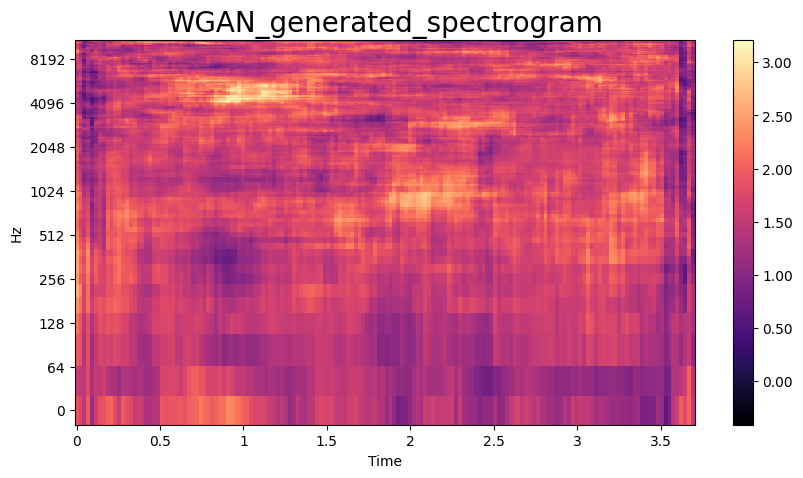

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

img = librosa.display.specshow(spectrogram, x_axis='time', y_axis='log')
plt.title('WGAN_generated_spectrogram', fontsize=20)
plt.colorbar(img, format='%0.2f')

plt.show()

In [15]:
audio = librosa.feature.inverse.mel_to_audio(spectrogram)

path = '../models/generated_samples/'
file_name = 'WPGAN_generated_audio.wav'

sf.write(path + file_name, audio, 22050)